In [26]:
Import all packages

In [38]:
import numpy as np
import pandas as pd
import missingno as msno
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Imputer
from sklearn_pandas import DataFrameMapper, CategoricalImputer
# train test split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [21]:
class Categorical_Imputer:
    """
    Imputing categorical data using the most frequent value
    """
    
    # instance attribute
    def __init__(self, strategy):
        self.strategy = strategy
        
    # instance method
    def fit_transform(self, df:'dataframe')->'dataframe':
        """
        Fill in missing categorical values using most frequent value
        """
        
        # instantiate CategoricalImputer
        imputer = CategoricalImputer()
        
        # convert array to dataframe
        df_filled = df.apply(lambda x: imputer.fit_transform(x), axis=0)
        
        # return filled dataframe
        return df_filled
        

Import the Dataset

In [6]:
df = pd.read_csv('C:\Personal\MTech\Books and Materials\Data Mining\Assignment\Assignment_BLR (1)\kidneyChronic.csv')

Check for null values

In [20]:
df.isna().values.any()

True

In [7]:
df.replace('?', np.nan, inplace=True)

Display missing record

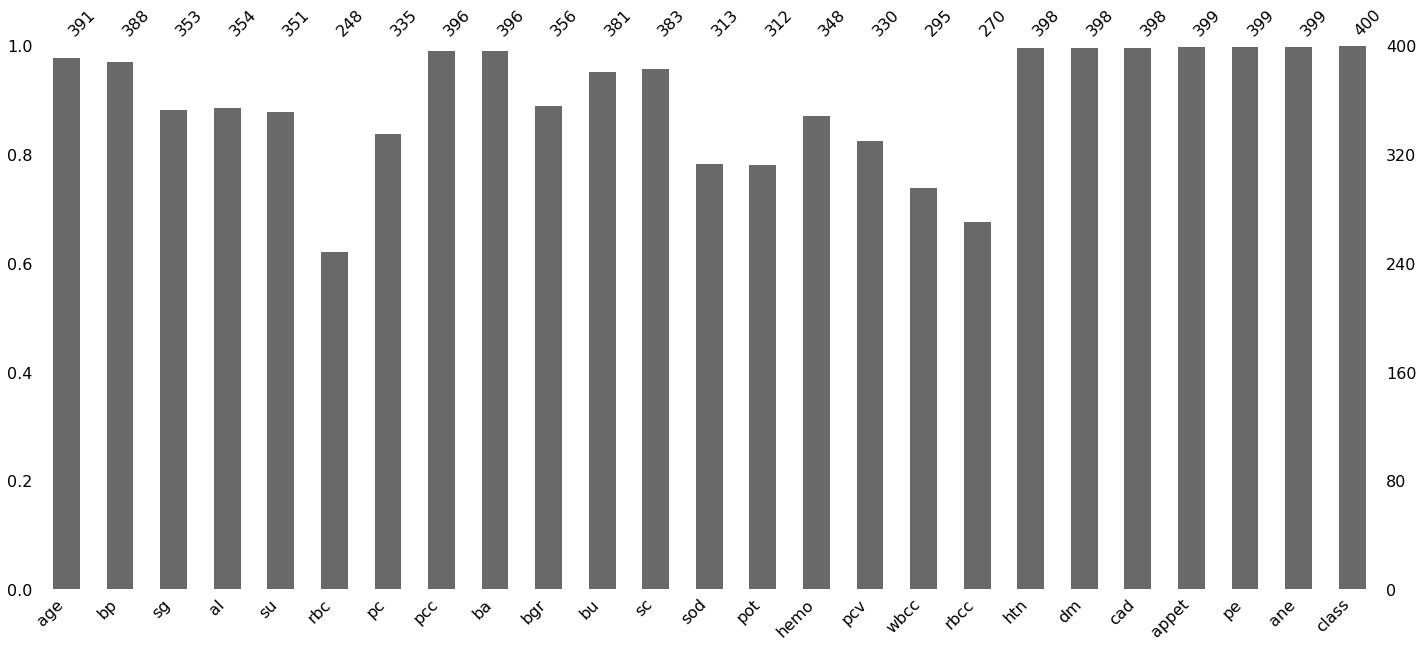

In [8]:
msno.bar(df) 

Getting the Numerical and categorical columns

In [9]:
numerical_columns = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
categorical_columns = df.columns.drop('class').drop(numerical_columns)

Covert to Numerical data

In [10]:
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Check the number of unique values of categorical columns

In [11]:
df[categorical_columns].apply(lambda x: x.nunique(), axis=0)

rbc      2
pc       2
pcc      2
ba       2
htn      2
dm       5
cad      3
appet    2
pe       2
ane      2
dtype: int64

In [12]:
df['dm'].unique()

array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)

In [13]:
df['cad'].unique()

array(['no', 'yes', '\tno', nan], dtype=object)

Strip '\t' from the values

In [14]:
df['dm']=df['dm'].str.strip()
df['cad']=df['cad'].str.strip()

In [26]:
df[categorical_columns].apply(lambda x: x.nunique(), axis=0)

rbc      2
pc       2
pcc      2
ba       2
htn      2
dm       2
cad      2
appet    2
pe       2
ane      2
dtype: int64

Convert class value to Numeric

In [15]:
num_imp = Imputer(missing_values=np.nan, strategy='median', axis=0)

# Imputing data

imputing on numerical data

In [16]:
num_imp = Imputer(missing_values=np.nan, strategy='median', axis=0)
df[numerical_columns] = num_imp.fit_transform(df[numerical_columns])

imputing on Categorical data

In [22]:
cate_imputer = Categorical_Imputer(strategy='most_frequent')
df[categorical_columns] = cate_imputer.fit_transform(df[categorical_columns])


# Converting all values to numerical values

In [23]:
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0})

In [25]:
df.info

<bound method DataFrame.info of       age     bp     sg   al   su  rbc  pc  pcc  ba    bgr   ...     pcv  \
0    48.0   80.0  1.020  1.0  0.0    0   0    0   0  121.0   ...    44.0   
1     7.0   50.0  1.020  4.0  0.0    0   0    0   0  121.0   ...    38.0   
2    62.0   80.0  1.010  2.0  3.0    0   0    0   0  423.0   ...    31.0   
3    48.0   70.0  1.005  4.0  0.0    0   1    1   0  117.0   ...    32.0   
4    51.0   80.0  1.010  2.0  0.0    0   0    0   0  106.0   ...    35.0   
5    60.0   90.0  1.015  3.0  0.0    0   0    0   0   74.0   ...    39.0   
6    68.0   70.0  1.010  0.0  0.0    0   0    0   0  100.0   ...    36.0   
7    24.0   80.0  1.015  2.0  4.0    0   1    0   0  410.0   ...    44.0   
8    52.0  100.0  1.015  3.0  0.0    0   1    1   0  138.0   ...    33.0   
9    53.0   90.0  1.020  2.0  0.0    1   1    1   0   70.0   ...    29.0   
10   50.0   60.0  1.010  2.0  4.0    0   1    1   0  490.0   ...    28.0   
11   63.0   70.0  1.010  3.0  0.0    1   1    1   0  380

# Creating train and test data

In [27]:
X = df.drop(columns=['class'])
y= df['class']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=21, stratify=y)

In [29]:
X_train.shape

(280, 24)

In [30]:
y_train.shape

(280,)

In [31]:
X_test.shape

(120, 24)

In [32]:
y_test.shape

(120,)

# testing with different models

Using Decision Tree Classification

In [34]:
Decision_tree_classification = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(Decision_tree_classification.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(Decision_tree_classification.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.95


Using Gaussian Naive Bayes

In [35]:
Gaussian_Naive_Bayes = GaussianNB()
Gaussian_Naive_Bayes.fit(X_train, y_train)
print('Accuracy of Gaussian Naive Bayes classifier on training set: {:.2f}'
     .format(Gaussian_Naive_Bayes.score(X_train, y_train)))
print('Accuracy of Gaussian Naive Bayes classifier on test set: {:.2f}'
     .format(Gaussian_Naive_Bayes.score(X_test, y_test)))

Accuracy of Gaussian Naive Bayes classifier on training set: 0.96
Accuracy of Gaussian Naive Bayes classifier on test set: 0.97


Using SVM

In [36]:
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 0.62


Using Random Forest Classifier

In [39]:
Random_forest_Classifier = RandomForestClassifier()
Random_forest_Classifier.fit(X_train, y_train)
print('Accuracy of Random forest Classifier classifier on training set: {:.2f}'
     .format(Random_forest_Classifier.score(X_train, y_train)))
print('Accuracy of Random forest Classifier classifier on test set: {:.2f}'
     .format(Random_forest_Classifier.score(X_test, y_test)))

Accuracy of Random forest Classifier classifier on training set: 1.00
Accuracy of Random forest Classifier classifier on test set: 0.97
